In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import json
import matplotlib
%matplotlib inline

In [2]:
palette = ['#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b',
           '#e377c2','#7f7f7f','#bcbd22','#17becf']
plt.rcParams['xtick.labelsize']=15

## Vendite

In [3]:
df1 =pd.read_csv('lineplot\\toscana_upd_v.csv')
df1 = df1.set_index('city').T
df1.index = pd.to_datetime(df1.index)
df1.index.freq='MS'
df1.head()

city,prato,pisa,massa,lucca,firenze,livorno,arezzo,siena,grosseto,pistoia
2012-09-01,2389,3230,3729,2670,4051,2730,2098,3916,2727,2030
2012-10-01,2379,3225,3738,2680,4008,2713,2090,3910,2687,2031
2012-11-01,2367,3207,3797,2646,3988,2701,2095,3922,2678,2037
2012-12-01,2352,3187,3704,2620,3973,2702,2086,3926,2657,2031
2013-01-01,2342,3202,3716,2611,3956,2710,2075,3916,2665,2047


C:\Users\Tommaso\anaconda3\envs\tsa_course\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


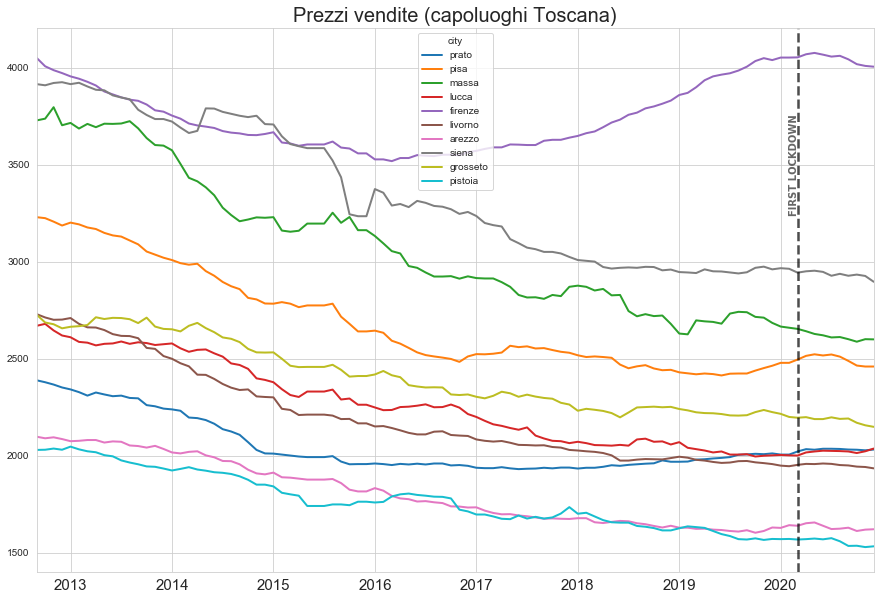

In [4]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3500, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi vendite (capoluoghi Toscana)', fontsize = 20);

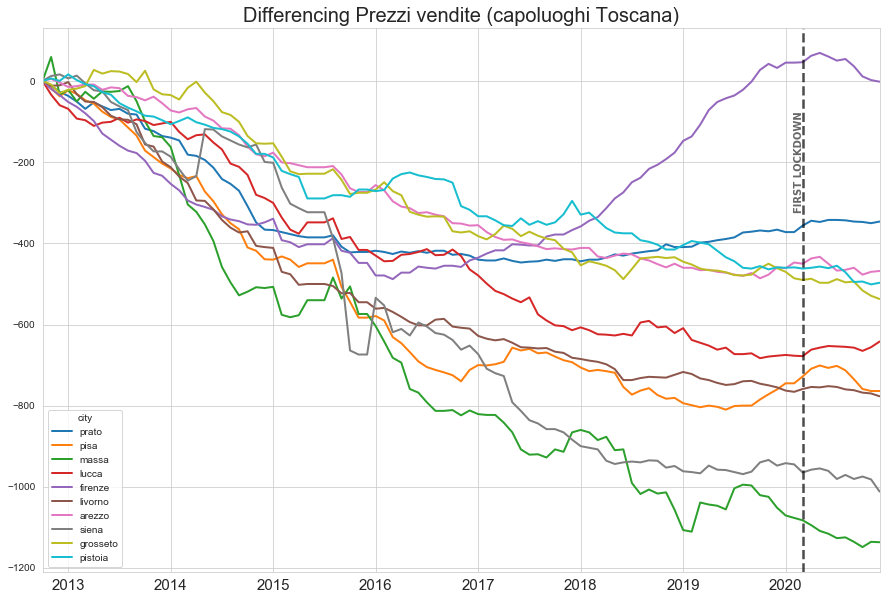

In [5]:
dfs = df1.copy().iloc[1:]
for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',-200, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Differencing Prezzi vendite (capoluoghi Toscana)', fontsize = 20);

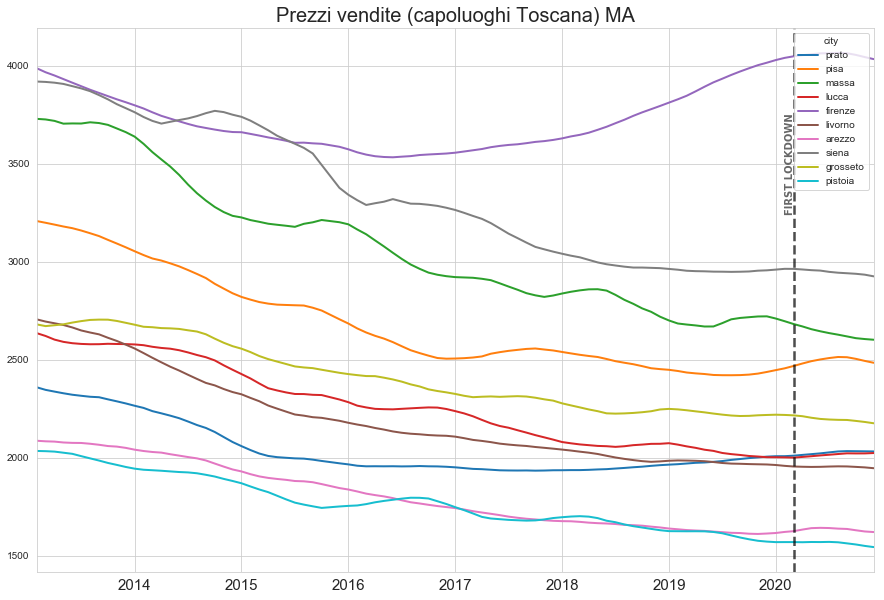

In [6]:
for colname in df1.columns:
    df1[colname] = df1[colname].rolling(window = 6).mean()
    
df1 = df1.iloc[5:]

df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3500, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi vendite (capoluoghi Toscana) MA', fontsize = 20);

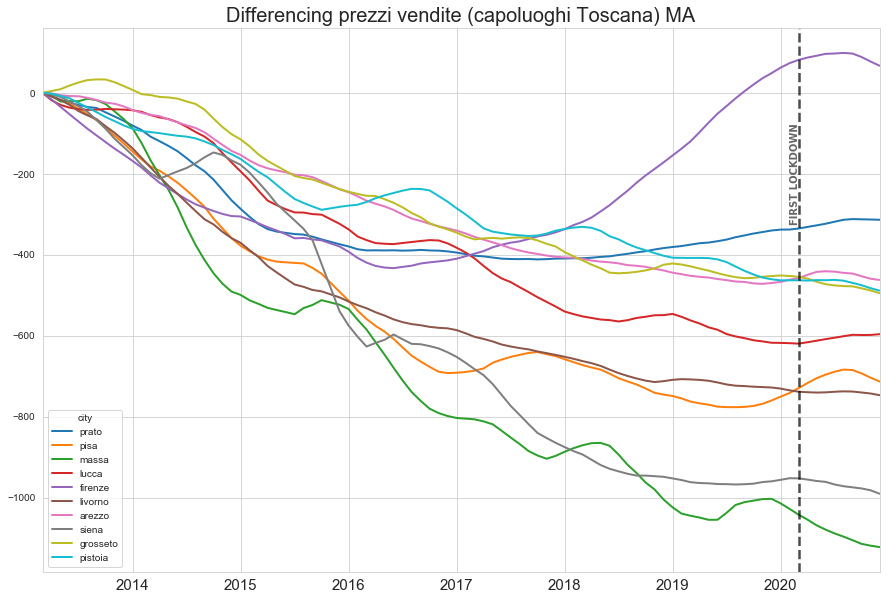

In [7]:
for colname in df1.columns:
    dfs[colname] = dfs[colname].rolling(window = 6).mean()
    
dfs = dfs.iloc[5:]

for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',-200, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Differencing prezzi vendite (capoluoghi Toscana) MA', fontsize = 20);

### ETS Decomposition

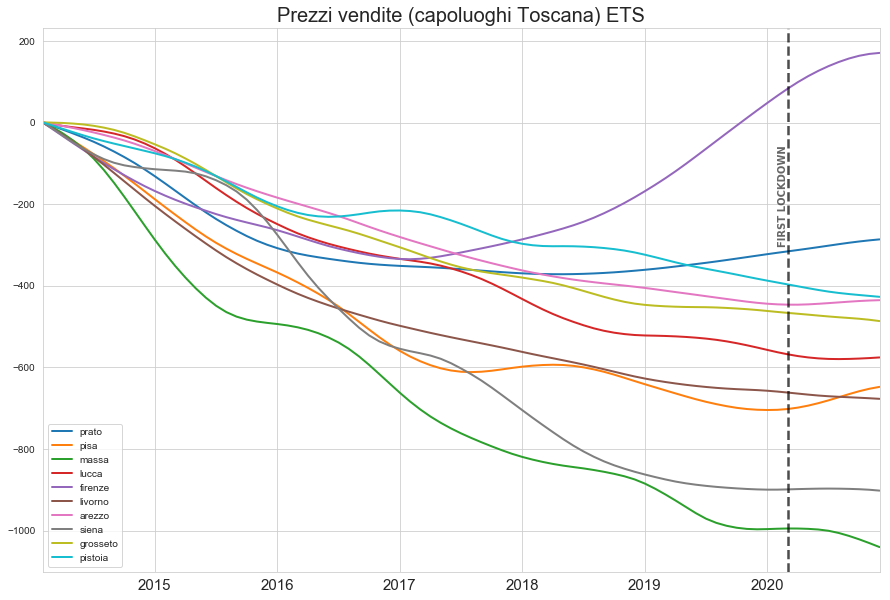

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['prato'], model='mul',two_sided=False)
dfd=pd.DataFrame(pd.Series(result.trend).dropna())

for city in df1.columns:
    result = seasonal_decompose(df1[city], model='mul',two_sided=False)
    ser = pd.Series(result.trend).dropna()
    dfd[ser.name] = ser


for colname in dfd.columns:
    dfd[colname] = dfd[colname].apply(lambda x : x - dfd[colname].iloc[0]+1)
    
dfd.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',-180, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('Prezzi vendite (capoluoghi Toscana) ETS',fontsize=20);
#plt.savefig('lineplot\\metrop_vendite_immobili_ETS.png')

#### HP filter

In [9]:
from statsmodels.tsa.filters.hp_filter import hpfilter


for colname in df1.columns:
# Tuple unpacking
    cycle, df1[colname] = hpfilter(df1[colname], lamb=14400)

for colname in df1.columns:
    df1[colname] = df1[colname].apply(lambda x : x - df1[colname].iloc[0]+1)

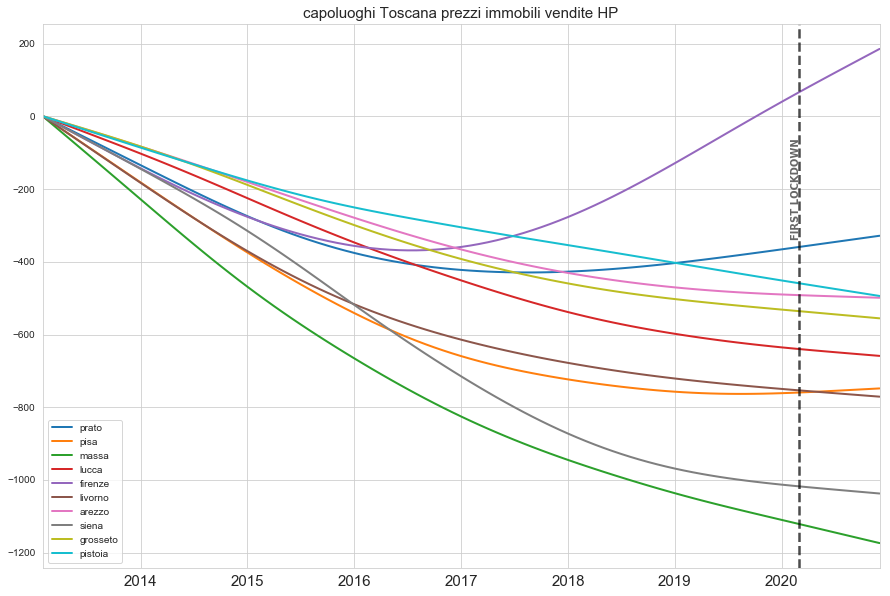

In [10]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',-200, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('capoluoghi Toscana prezzi immobili vendite HP',fontsize=15);
#plt.savefig('lineplot\\metrop_vendite_immobili_HP')

## Affitti

In [11]:
df1 =pd.read_csv('lineplot\\toscana_upd_a.csv')
df1 = df1.set_index('city').T
df1.index = pd.to_datetime(df1.index)
df1.head()

city,prato,pisa,massa,lucca,firenze,livorno,arezzo,siena,grosseto,pistoia
2012-09-01,9.7,10.9,8.9,9.1,13.3,9.7,7.9,11.6,9.1,8.0
2012-10-01,9.7,11.0,9.2,9.1,13.3,9.7,7.9,11.5,9.0,8.0
2012-11-01,9.7,10.9,8.8,9.1,13.3,9.7,7.9,11.6,8.9,8.0
2012-12-01,9.7,10.8,8.5,9.0,13.3,9.5,7.9,11.6,8.7,8.0
2013-01-01,9.7,10.7,8.4,9.0,13.4,9.4,7.8,11.5,8.7,8.0


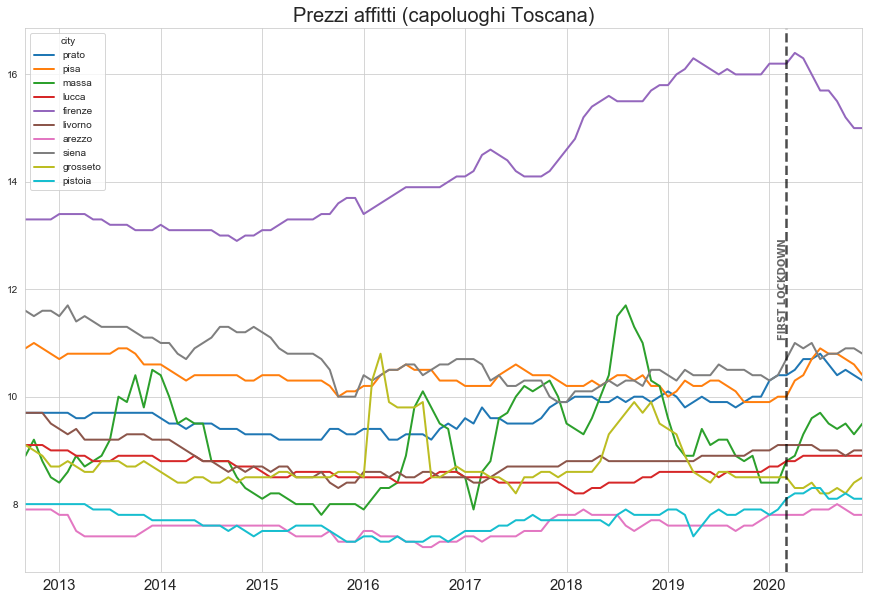

In [12]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',12, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi affitti (capoluoghi Toscana)', fontsize = 20);

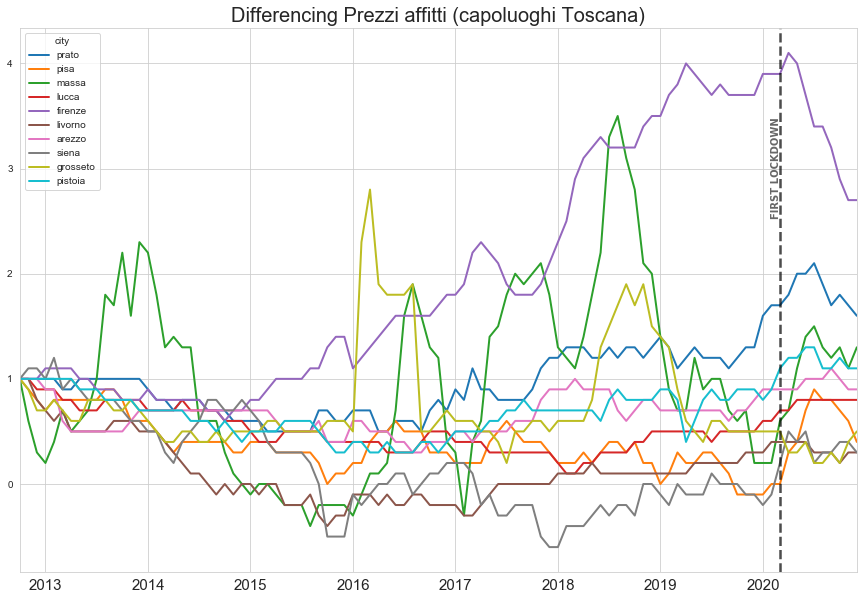

In [13]:
dfs = df1.copy().iloc[1:]
for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Differencing Prezzi affitti (capoluoghi Toscana)', fontsize = 20);

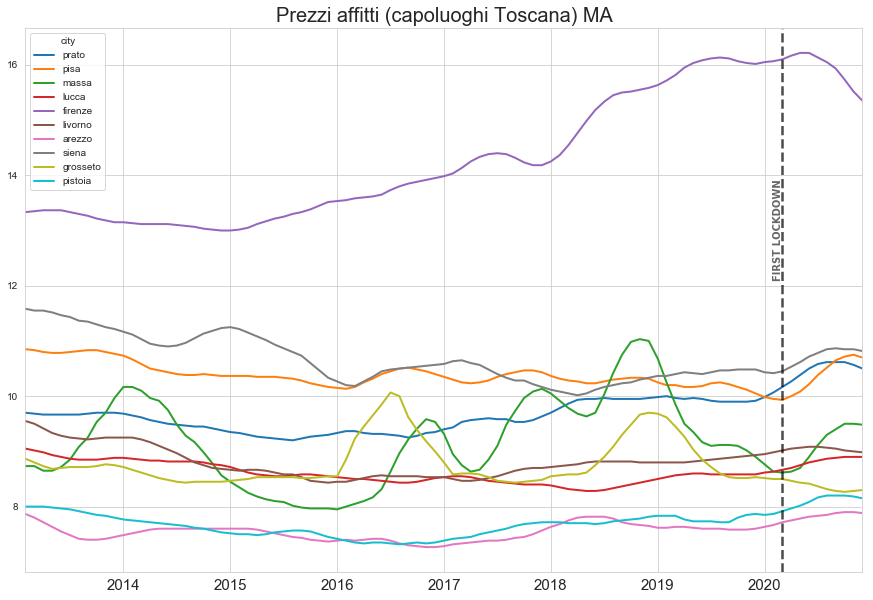

In [14]:
for colname in df1.columns:
    df1[colname] = df1[colname].rolling(window = 6).mean()
    
df1 = df1.iloc[5:]

df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',13, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Prezzi affitti (capoluoghi Toscana) MA', fontsize = 20);

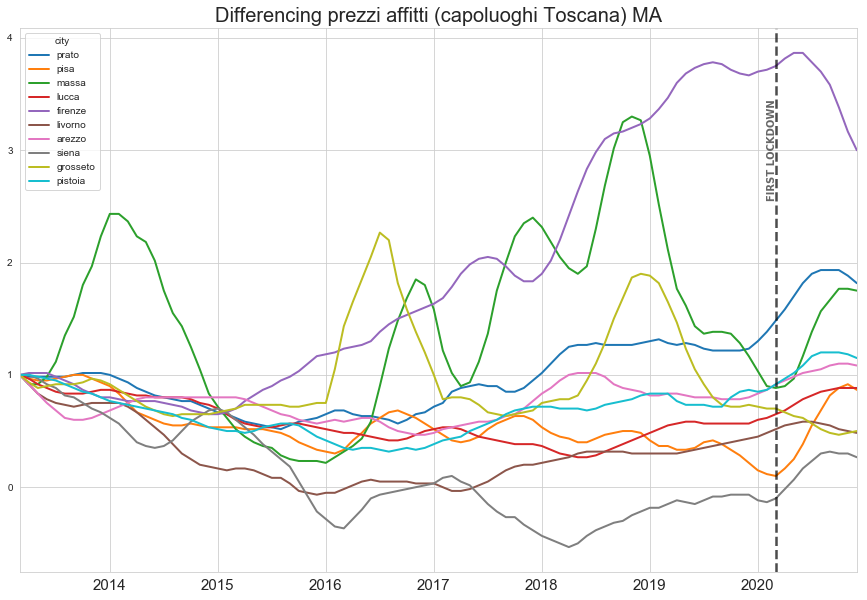

In [15]:
for colname in df1.columns:
    dfs[colname] = dfs[colname].rolling(window = 6).mean()
    
dfs = dfs.iloc[5:]

for colname in dfs.columns:
    dfs[colname] = dfs[colname].apply(lambda x : x - dfs[colname].iloc[0]+1)
    
dfs.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',3, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.title('Differencing prezzi affitti (capoluoghi Toscana) MA', fontsize = 20);

### ETS Decomposition

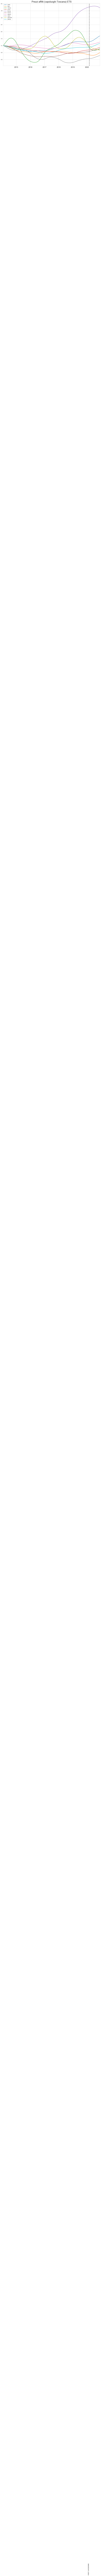

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['prato'], model='mul',two_sided=False)
dfd=pd.DataFrame(pd.Series(result.trend).dropna())

for city in df1.columns:
    result = seasonal_decompose(df1[city], model='mul',two_sided=False)
    ser = pd.Series(result.trend).dropna()
    dfd[ser.name] = ser


for colname in dfd.columns:
    dfd[colname] = dfd[colname].apply(lambda x : x - dfd[colname].iloc[0]+1)
    
dfd.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',-180, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('Prezzi affitti (capoluoghi Toscana) ETS',fontsize=20);
#plt.savefig('lineplot\\metrop_affitti_immobili_ETS.png')

#### HP filter

In [17]:
from statsmodels.tsa.filters.hp_filter import hpfilter


for colname in df1.columns:
# Tuple unpacking
    cycle, df1[colname] = hpfilter(df1[colname], lamb=14400)

for colname in df1.columns:
    df1[colname] = df1[colname].apply(lambda x : x - df1[colname].iloc[0]+1)

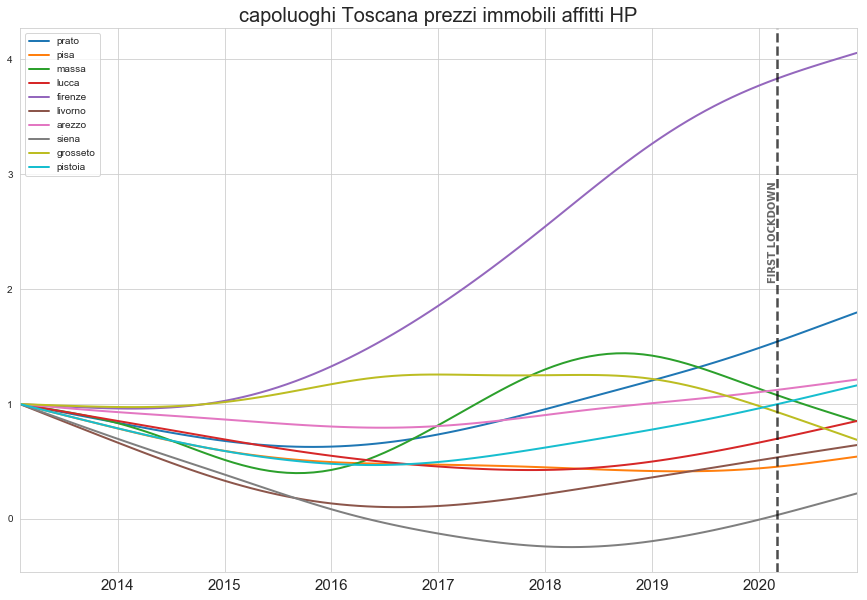

In [18]:
df1.plot(figsize= (15,10), color=palette, lw=2).autoscale(axis='x',tight=True)
plt.axvline(x='2020-03-01', c = 'black', ls ='--', lw=2.5, alpha = 0.7)
plt.text('2020-02-01',2.5, "FIRST LOCKDOWN", rotation=90, verticalalignment='center', fontname='Helvetica', alpha = 0.7, size=10, weight='bold')
plt.legend()
plt.title('capoluoghi Toscana prezzi immobili affitti HP',fontsize=20);
#plt.savefig('lineplot\\metrop_vendite_immobili_HP')